In [63]:
import os
import pandas as pd
from pathlib import Path
import json
from pprint import pprint
from copy import deepcopy
import random
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
working_path = Path('/home/zhanj289/side_projects/cord_19/')

In [65]:
data_path = Path('/home/zhanj289/side_projects/cord_19/') / 'data'

In [66]:
## PMC JSON looks like having no 'abstract' key

In [67]:
## check meta data

meta_data = pd.read_csv(data_path/'metadata.csv')

In [68]:
meta_data[meta_data['abstract'].isnull()].head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
31,6iu1dtyl,6e8517cb25ff228cb48da90a9c97d9c274dc8031,PMC,The site of origin of the 1918 influenza pande...,10.1186/1479-5876-2-3,PMC340389,14733617.0,no-cc,NaN,2004-01-20,"Barry, John M",J Transl Med,NaN,NaN,NaN,document_parses/pdf_json/6e8517cb25ff228cb48da...,document_parses/pmc_json/PMC340389.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
35,1769ovyk,c5131e5f5c6000ec84139edc64778a6f1d391b83,PMC,8th Annual Toronto Critical Care Medicine Symp...,10.1186/cc2429,PMC420071,14975048.0,no-cc,NaN,2004-01-02,"Granton, Jeff; Granton, John",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/c5131e5f5c6000ec84139...,document_parses/pmc_json/PMC420071.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,NaN
36,tixxm78q,8a7d5de5ea680e784ab2bd877240bf09e4c1c02d,PMC,Recently published papers: all the usual suspe...,10.1186/cc2449,PMC420074,14975037.0,no-cc,NaN,2004-01-02,"Ball, Jonathan",Crit Care,NaN,NaN,NaN,document_parses/pdf_json/8a7d5de5ea680e784ab2b...,document_parses/pmc_json/PMC420074.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...,NaN
105,r8j6lhoc,c6c8b82bc5a800425b075540eff41b0af719f80f,PMC,HIV Epidemiology in Africa: Weak Variables and...,10.1371/journal.pmed.0020137,PMC1140948,15916469.0,cc-by,NaN,2005-05-31,"Brody, Stuart; Potterat, John J",PLoS Med,NaN,NaN,NaN,document_parses/pdf_json/c6c8b82bc5a800425b075...,document_parses/pmc_json/PMC1140948.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN
133,az4a70b0,cc698ffabf545da2fd7ee6a5cb4f25d9102a856a,PMC,eCAM benefits from diversity that derives from...,10.1093/ecam/neh120,PMC1193560,16136204.0,no-cc,NaN,2005-09-01,"Cooper, Edwin L.",Evid Based Complement Alternat Med,NaN,NaN,NaN,document_parses/pdf_json/cc698ffabf545da2fd7ee...,document_parses/pmc_json/PMC1193560.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,NaN


In [69]:

# paper without pdf_json or pmc_json

len(meta_data[(meta_data['pdf_json_files'].isnull()) &(meta_data['pmc_json_files'].isnull()) ])

75786

In [70]:

# paper with pdf_json but no pmc_json

len(meta_data[(meta_data['pdf_json_files'].notnull()) &(meta_data['pmc_json_files'].isnull()) ])

16595

In [71]:

# paper with pmc_json bbut no pdj_json

len(meta_data[(meta_data['pdf_json_files'].isnull()) &(meta_data['pmc_json_files'].notnull()) ])

2819

In [72]:

# paper with pmc_json bbut no pdj_json

len(meta_data[(meta_data['pdf_json_files'].notnull()) &(meta_data['pmc_json_files'].notnull()) ])

45332

In [73]:
# paper has no abstract in metadata
meta_data_no_abstract  = meta_data[meta_data['abstract'].isnull()]

In [74]:
len(meta_data_no_abstract)

30914

In [75]:

# paper without pdf_json or pmc_json

len(meta_data_no_abstract[(meta_data_no_abstract['pdf_json_files'].isnull()) &(meta_data_no_abstract['pmc_json_files'].isnull()) ])

20142

In [76]:
## look closely at a paper without abstract bbut has pdf_json

meta_data_no_abstract[(meta_data_no_abstract['pdf_json_files'].notnull()) &(meta_data_no_abstract['pmc_json_files'].isnull()) ]['pdf_json_files'][224]

'document_parses/pdf_json/a037a1a6fe76f1c43e33a639231b9874cb655f88.json'

In [ ]:
# but it has abstraxt in json

In [67]:
test_file = json.load(open('data/document_parses/pdf_json/a037a1a6fe76f1c43e33a639231b9874cb655f88.json', 'rb'))

test_file['abstract']

### metadata seems cannot reflect whether we have abstract in the dataset

In [77]:
# The following function is used in creating
def format_name(author):
    middle_name = " ".join(author['middle'])
    
    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))
    
    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)

def format_authors(authors, with_affiliation=False):
    name_ls = []
    
    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)
    
    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}
    
    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += " "
        body += text
        body += " "
    
    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []
    
    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'], 
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

In [78]:
def load_files(dirname, all_paper = False, paper_number = 1000):
    
    filenames = os.listdir(dirname)
    
    # load a few paper or all
    if all_paper == False:
        rand_indx = random.sample(range(0,len(filenames)), paper_number)
    else:
        rand_indx = list(range(0, len(filenames)))
    
    
    raw_files = []

    for i in tqdm(rand_indx):
        filename = dirname / filenames[i]
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)
    
    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []
    
    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'], 
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text', 
                 'bibliography','raw_authors','raw_bibliography']

    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()
    
    return clean_df

### load and clean data

In [79]:
pdf_path = data_path / 'document_parses'/'pdf_json/'

# check size of data
filenames = os.listdir(pdf_path)
print("Number of articles retrieved from pdf:", len(filenames))

Number of articles retrieved from pdf: 65782


In [80]:
# attach all pdf to a list
all_files = load_files(pdf_path, all_paper = False, paper_number = 3000)

In [81]:
# some data exploration

file = all_files[555]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [82]:
for i in range(len(file['body_text'])):
    pprint(file['body_text'][i]['section'])

'Introduction'
'Introduction'
'Introduction'
'Introduction'
'Phenylpropanoids'
'Phenylpropanoids'
'Isoflavones'
'Isoflavones'
'Isoflavones'
'Isopentenyl flavonoids'
'Isopentenyl flavonoids'
'Isopentenyl flavonoids'
'Phenolic acids'
'Phenolic acids'
'Terpenoids'
'Terpenoids'
'Terpenoids'
'Sesquiterpenoids'
'Artemisinin'
'Artemisinin'
'Artemisinin'
'Artemisinin'
'Patchoulol'
'Patchoulol'
'Diterpenoids'
'Tanshinone'
'Tanshinone'
'Tanshinone'
'Tanshinone'
'Tanshinone'
'Taxol (paclitaxel)'
'Taxol (paclitaxel)'
'Taxol (paclitaxel)'
'Triterpenoids'
'Ginsenosides'
'Ginsenosides'
'Cucurbitacins'
'Glycyrrhizin'
'Glycyrrhizin'
'Alkaloids'
'Alkaloids'
'Perspective'


In [83]:
file['body_text'][6]

{'text': 'The isoflavones are well studied for their substantial health promoting benefits. They are found mainly in leguminous plants and are the major bioactive ingredients in soybean, Astragalus, Pueraria lobata [39]. Isoflavones are converted from flavanones by the isoflavone synthase (IFS). By using EST-based approach combined with enzymatic assays, P450s of CYP93C subfamily from soybean were shown to have such activities [40, 41] . Members of this subfamily with IFS activity were also reported in other leguminous plants, such as Lotus japonicus [42] and Trifolium pratense [43] .',
 'cite_spans': [{'start': 421, 'end': 425, 'text': '[40,', 'ref_id': None},
  {'start': 426, 'end': 429, 'text': '41]', 'ref_id': None},
  {'start': 575, 'end': 579, 'text': '[43]', 'ref_id': None}],
 'ref_spans': [],
 'section': 'Isoflavones'}

In [84]:
file['body_text'][7]

{'text': 'Astragalus membranaceus, a species of Fabaceae, has been used in TCM for thousands of years. Astragaus is considered an adaptogen because it is believed to help protect the body against stresses, including those of physical, mental or emotional [44, 45] . In China, Astragalus has been used to help patients with severe forms of heart disease in relieving symptoms, lowering cholesterol levels and improving heart function. Constituents of the Astragalus roots (radix astragali) include polysaccharides, triterpenoids (astragalosides) and isoflavones [46, 47] . Isoflavones such as calycosin-7-glucoside and ononin are considered the important active components in this medicine. Hairy root system of Astragalus was developed a long time ago to produce these ingredients [48, 49] . Research at molecular level in this plant is limited, but will help reveal the biosynthetic pathway in this leguminous medicinal plant [50] .',
 'cite_spans': [{'start': 245, 'end': 249, 'text': '[44,', 'ref_

In [85]:
file['body_text'][i]['section']

'Perspective'

In [86]:
## Generate CSV (PDF JSON)


cleaned_files = []

for file in tqdm(all_files):
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'], 
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]
    
    cleaned_files.append(features)

In [87]:
col_names = [
    'paper_id', 
    'title', 
    'authors',
    'affiliations', 
    'abstract', 
    'text', 
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

paper_df = pd.DataFrame(cleaned_files, columns=col_names)

paper_df['abstract_word_count'] = paper_df['abstract'].apply(lambda x: len(x.strip().split()))
paper_df['body_word_count'] = paper_df['text'].apply(lambda x: len(x.strip().split()))

paper_df.head(2)

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,abstract_word_count,body_word_count
0,27e9373516e9a1f67fbc5e8d85ef78c476ce6da8,Analysis of synonymous codon usage patterns in...,"Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...","Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...",Abstract Torque teno sus virus 1 (TTSuV1) is a...,Introduction It is well known that the genetic...,Two types of linkage between codon usage and g...,"[{'first': 'Zhicheng', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Two typ...",281,3853
1,231377128610c5776532830eb8eb8d79f17fb120,DDX1 is an RNA-dependent ATPase Involved in HI...,"Stephen P Edgcomb, Andrew B Carmel, Souad Naji...","Stephen P Edgcomb, Andrew B Carmel, Souad Naji...",Abstract The HIV-1 Rev protein is essential fo...,Introduction After cellular entry and genomic ...,"The ins and outs of HIV Rev, T J Hope, Arch Bi...","[{'first': 'Stephen', 'middle': ['P'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The ins...",208,7317


In [88]:
paper_df.shape

(3000, 11)

In [89]:
paper_df[['abstract_word_count', 'body_word_count']].describe()

,abstract_word_count,body_word_count
count,3000.000000,3000.000000
mean,160.216333,4580.471000
std,200.983096,10271.161227
min,0.000000,7.000000
25%,0.000000,1944.750000
50%,152.000000,3350.000000
75%,230.000000,5142.000000
max,3934.000000,282413.000000


In [90]:
## check distribution of word counts

7345.299999999999

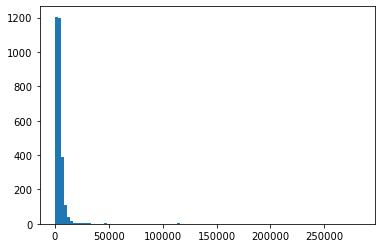

In [91]:
_ = plt.hist(paper_df['body_word_count'], bins= 100)

paper_df['body_word_count'].quantile(0.9)

301.0999999999999

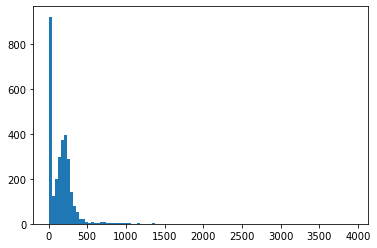

In [92]:
_ = plt.hist(paper_df['abstract_word_count'], bins= 100)

paper_df['abstract_word_count'].quantile(0.9)

In [93]:
### clean dataset and trim dataset

In [94]:
import re 
def clean_dataset(text):
    text=re.sub('[\[].*?[\]]', '', str(text))  #remove in-text citation
    text=re.sub(r'^https?:\/\/.*[\r\n]*', '',text, flags=re.MULTILINE)#remove hyperlink
    text=re.sub(r'\\b[A-Z a-z 0-9._ - ]*[@](.*?)[.]{1,3} \\b', '', text)#remove email
    text=re.sub(r'^a1111111111 a1111111111 a1111111111 a1111111111 a1111111111.*[\r\n]*',' ',text)#have no idea what is a11111.. is, but I remove it now
    text=re.sub(r'  +', ' ',text ) #remove extra space
    text=re.sub('[,\.!?]', '', text)
    text=re.sub(r's/ ( *)/\1/g','',text) 
    text=re.sub(r'[^\w\s]','',text) #strip punctions (recheck)
    return text

In [95]:
paper_df['text'] =paper_df['text'].apply(clean_dataset)
paper_df['title'] =paper_df['title'].apply(clean_dataset)
paper_df['abstract'] =paper_df['abstract'].apply(clean_dataset)
paper_df['text'] =paper_df['text'].apply(clean_dataset)

paper_df['abstract'] = paper_df['abstract'].map(lambda x: x.lower())
paper_df['text'] = paper_df['text'].map(lambda x: x.lower())

paper_df=paper_df.reset_index(drop=True)

In [96]:
paper_df.shape

(3000, 11)

In [97]:
## Drop papers with duplication and where abstract or paper length is too long

    
paper_df.drop_duplicates(['abstract', 'text'], inplace=True)


# 300 is about 90% percentile
trimmed_df = paper_df[paper_df['abstract_word_count'] < 300]

# arbitry number
trimmed_df = trimmed_df[(trimmed_df['body_word_count'] >500) &( trimmed_df['body_word_count'] < 4000)]





In [98]:
trimmed_df.shape

(1545, 11)

In [99]:
## Train Test Split

In [100]:
test_df = trimmed_df[trimmed_df['abstract_word_count'] < 10]

In [101]:
train_df = trimmed_df.drop(test_df.index)

In [102]:
train_df=train_df.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

In [103]:
test_df.shape

(512, 11)

In [104]:
train_df.shape

(1033, 11)

In [105]:
#remove articles that are not related to COVID-19 based on publish time
## WIP
# clean_df=clean_df[(clean_df['publish_time']>'2019-11-01') & (merge_final['text_body'].str.contains('nCoV|Cov|COVID|covid|SARS-CoV-2|sars-cov-2'))]
# clean_df.shape

In [106]:

output_path = data_path/ 'cleaned_data'
# os.mkdir(output_path)

test_df.to_csv(output_path / 'test_dataset.csv', index=False)
train_df.to_csv(output_path / 'train_dataset.csv', index=False)

## Algorithm testing

In [107]:
train_df = pd.read_csv(data_path/ 'cleaned_data' / 'train_dataset.csv')
test_df = pd.read_csv(data_path/ 'cleaned_data' / 'test_dataset.csv')

In [ ]:

# load BART summarizer
# summarizer = pipeline(task="summarization")


In [ ]:


# summary = summarizer(clean_df['abstract'][0], min_length=50, max_length=3312)

In [13]:
## BERT
from summarizer import Summarizer

model = Summarizer()
result = model(train_df['abstract'][0], min_length=50,max_length=100)
full0 = ''.join(result)

In [14]:
pprint(full0)

''


In [10]:
#GPT2
from summarizer import Summarizer,TransformerSummarizer

GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")
full = ''.join(GPT2_model(train_df['abstract'][0], min_length=50, max_length=100))

In [11]:
pprint(full)

''


In [ ]:
## Bart Text Summarization

#### problem:

#### BART seems working anyway
#### limitation is 1024 words(token)

In [31]:
import torch
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import pipeline

torch_device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

summarizer = pipeline(task="summarization", model=model, tokenizer=tokenizer)

In [41]:
# test size of tokens
input_ids = tokenizer.encode(train_df['text'][1], add_special_tokens=True)

## input is too long!
len(input_ids)

In [ ]:
# ' '.join(tokenizer.convert_ids_to_tokens(input_ids)) 

In [48]:
full3 = summarizer(train_df['abstract'][0], min_length=30, max_length=100)
print(full3)

[{'summary_text': 'Study investigated the longterm impact of antibiotic use policy on the rates of consumption expressed as dailydefined doses1000 patientdays of various parenteral antibiotics. It also looked at the prevalence of methicillinresistant Staphylococcus aureus MRSA and the incidence of healthcareassociated MRSA HAMRSA infection.'}]


In [ ]:
## T5

## T5 limitation is 512 tokens

In [47]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, T5Config

model = T5ForConditionalGeneration.from_pretrained('t5-small')
tokenizer = T5Tokenizer.from_pretrained('t5-small')
device = torch.device('cpu')

text = train_df['abstract'][0]


preprocess_text = text.strip().replace("\n","")
t5_prepared_Text = "summarize: "+preprocess_text
print ("original text preprocessed: \n", preprocess_text)

tokenized_text = tokenizer.encode(t5_prepared_Text, return_tensors="pt").to(device)


# summmarize 
summary_ids = model.generate(tokenized_text,
                            num_beams=4,
                            no_repeat_ngram_size=2,
                            min_length=30,
                            max_length=100,
                            early_stopping=True)

output = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print ("\n\nSummarized text: \n",output)

original text preprocessed: 
 Abstract The present study investigated the longterm impact of antibiotic use policy on the rates of consumption expressed as dailydefined doses1000 patientdays of various parenteral antibiotics and on the prevalence of methicillinresistant Staphylococcus aureus MRSA and the incidence of healthcareassociated MRSA HAMRSA infection at a tertiary care hospital from 2001 to 2009 During this time consumption of all antimicrobials for systemic use decreased by 33 This change was driven by a 44 decrease in the consumption of unrestricted antibacterials which was offset by a 42 increase in the consumption of restricted agents The trends in MRSA prevalence number of isolates1000 patientdays and HAMRSA incidence number of HAMRSAinfected persons1000 patientdays correlated with the trend in overall consumption of antimicrobials Significant positive correlations were observed between MRSA prevalence and the consumption of extendedspectrum and lactamaseresistant penicil

In [19]:
summarizer = pipeline("summarization", 
                      model="t5-base", 
                      tokenizer="t5-base", 
                      framework="tf")

summarizer(train_df['text'][0], min_length=5, max_length=20)


[{'summary_text': 'the prevalence of hamrsa and mrssa in ta'}]

In [44]:
len(train_df['text'][0].split())

2537

### LDA classification

In [110]:
train_df['abstract_tokens'] = train_df['abstract'].apply(lambda x: x.split())

In [112]:

def remove_abstract(text):
    words = [w for w in text if w != 'abstract']
    return words

In [114]:
train_df['abstract_tokens'] = train_df['abstract_tokens'].apply(lambda x: remove_abstract(x))

In [115]:
train_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,abstract_word_count,body_word_count,abstract_tokens
0,27e9373516e9a1f67fbc5e8d85ef78c476ce6da8,Analysis of synonymous codon usage patterns in...,"Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...","Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...",abstract torque teno sus virus 1 ttsuv1 is a n...,introduction it is well known that the genetic...,Two types of linkage between codon usage and g...,"[{'first': 'Zhicheng', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Two typ...",281,3853,"[torque, teno, sus, virus, 1, ttsuv1, is, a, n..."
1,e00c2c6b0f665650b300157efc46f99c621d190b,NaN,"Mark A Wainberg, Kuan-Teh Jeang","Mark A Wainberg (Jewish General Hospital, 3755...",abstract xenotropic murine leukemia virusrelat...,background xenotropic murine leukemia virusrel...,"Proc. Natl. Acad. Sci. USA, R Schlaberg, D J C...","[{'first': 'Mark', 'middle': ['A'], 'last': 'W...","{'BIBREF10': {'ref_id': 'b10', 'title': 'Proc....",55,1529,"[xenotropic, murine, leukemia, virusrelated, v..."
2,349bde29ae8991f5f2fff50c3250e6d1676eb6de,NFjB activation by equine arteritis virus is M...,"Amin Mottahedin, Maruthibabu Paidikondala, Har...","Amin Mottahedin, Maruthibabu Paidikondala, Har...",abstract nfjb a family of transcription factor...,equine arteritis virus eav is an enveloped si...,"Arteriviruses, E J Snijder, W J Spaan, , 2006;...","[{'first': 'Amin', 'middle': [], 'last': 'Mott...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Arteriv...",106,1954,"[nfjb, a, family, of, transcription, factors, ..."
3,8c0849795cf319de1b8a9f6cd3ae24f042a8936b,Glycosylated hemoglobin is associated with sys...,"Zhenzhou Wang, Zhe Du, Fengxue Zhu","Zhenzhou Wang, Zhe Du, Fengxue Zhu",abstract results a total of 132 patients were ...,introduction coronavirus disease covid19 is ca...,Prevalence of comorbidities in the novel Wuhan...,"[{'first': 'Zhenzhou', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Prevale...",165,1709,"[results, a, total, of, 132, patients, were, i..."
4,dc350cbdde2a3f0a4f9fa37f453fb8baa98f87f3,A GERMFREE STATUS DOES NOT PROTECT FROM THE LE...,"B Nemerya, D K Tuckerb, S Sparrowa",B Nemerya (Medical Research Council Laboratori...,abstract publicly funded repositories such as ...,toxicology unit and bexperimental embryology a...,"Colonization and bronchopulmonary infection, I...","[{'first': 'B', 'middle': [], 'last': 'Nemerya...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Coloniz...",58,2036,"[publicly, funded, repositories, such, as, the..."


In [124]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/zhanj289/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [125]:
from nltk.stem import WordNetLemmatizer

# define a function to lematize a list of tokens
lemmatizer = WordNetLemmatizer() # instantiate a lemmatizer
def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return lemmatized_tokens

In [126]:
train_df['abstract_tokens'] = train_df['abstract_tokens'].apply(lambda x: lemmatize_tokens(x)) #lemmatize words
train_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,abstract_word_count,body_word_count,abstract_tokens
0,27e9373516e9a1f67fbc5e8d85ef78c476ce6da8,Analysis of synonymous codon usage patterns in...,"Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...","Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...",abstract torque teno sus virus 1 ttsuv1 is a n...,introduction it is well known that the genetic...,Two types of linkage between codon usage and g...,"[{'first': 'Zhicheng', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Two typ...",281,3853,"[torque, teno, sus, virus, 1, ttsuv1, is, a, n..."
1,e00c2c6b0f665650b300157efc46f99c621d190b,NaN,"Mark A Wainberg, Kuan-Teh Jeang","Mark A Wainberg (Jewish General Hospital, 3755...",abstract xenotropic murine leukemia virusrelat...,background xenotropic murine leukemia virusrel...,"Proc. Natl. Acad. Sci. USA, R Schlaberg, D J C...","[{'first': 'Mark', 'middle': ['A'], 'last': 'W...","{'BIBREF10': {'ref_id': 'b10', 'title': 'Proc....",55,1529,"[xenotropic, murine, leukemia, virusrelated, v..."
2,349bde29ae8991f5f2fff50c3250e6d1676eb6de,NFjB activation by equine arteritis virus is M...,"Amin Mottahedin, Maruthibabu Paidikondala, Har...","Amin Mottahedin, Maruthibabu Paidikondala, Har...",abstract nfjb a family of transcription factor...,equine arteritis virus eav is an enveloped si...,"Arteriviruses, E J Snijder, W J Spaan, , 2006;...","[{'first': 'Amin', 'middle': [], 'last': 'Mott...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Arteriv...",106,1954,"[nfjb, a, family, of, transcription, factor, i..."
3,8c0849795cf319de1b8a9f6cd3ae24f042a8936b,Glycosylated hemoglobin is associated with sys...,"Zhenzhou Wang, Zhe Du, Fengxue Zhu","Zhenzhou Wang, Zhe Du, Fengxue Zhu",abstract results a total of 132 patients were ...,introduction coronavirus disease covid19 is ca...,Prevalence of comorbidities in the novel Wuhan...,"[{'first': 'Zhenzhou', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Prevale...",165,1709,"[result, a, total, of, 132, patient, were, inc..."
4,dc350cbdde2a3f0a4f9fa37f453fb8baa98f87f3,A GERMFREE STATUS DOES NOT PROTECT FROM THE LE...,"B Nemerya, D K Tuckerb, S Sparrowa",B Nemerya (Medical Research Council Laboratori...,abstract publicly funded repositories such as ...,toxicology unit and bexperimental embryology a...,"Colonization and bronchopulmonary infection, I...","[{'first': 'B', 'middle': [], 'last': 'Nemerya...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Coloniz...",58,2036,"[publicly, funded, repository, such, a, the, w..."


In [127]:
# define a function that converts a list of tokens into n-grams
def getNGrams(tokens, n):
    return [tokens[i : i + n] for i in range(len(tokens) - (n - 1))]

In [129]:
train_df['abstract_2-grams'] = train_df['abstract_tokens'].apply(lambda x: getNGrams(x, 2))
train_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography,abstract_word_count,body_word_count,abstract_tokens,abstract_2-grams
0,27e9373516e9a1f67fbc5e8d85ef78c476ce6da8,Analysis of synonymous codon usage patterns in...,"Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...","Zhicheng Zhang, Wei Dai, Yang Wang, • Chengpin...",abstract torque teno sus virus 1 ttsuv1 is a n...,introduction it is well known that the genetic...,Two types of linkage between codon usage and g...,"[{'first': 'Zhicheng', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Two typ...",281,3853,"[torque, teno, sus, virus, 1, ttsuv1, is, a, n...","[[torque, teno], [teno, sus], [sus, virus], [v..."
1,e00c2c6b0f665650b300157efc46f99c621d190b,NaN,"Mark A Wainberg, Kuan-Teh Jeang","Mark A Wainberg (Jewish General Hospital, 3755...",abstract xenotropic murine leukemia virusrelat...,background xenotropic murine leukemia virusrel...,"Proc. Natl. Acad. Sci. USA, R Schlaberg, D J C...","[{'first': 'Mark', 'middle': ['A'], 'last': 'W...","{'BIBREF10': {'ref_id': 'b10', 'title': 'Proc....",55,1529,"[xenotropic, murine, leukemia, virusrelated, v...","[[xenotropic, murine], [murine, leukemia], [le..."
2,349bde29ae8991f5f2fff50c3250e6d1676eb6de,NFjB activation by equine arteritis virus is M...,"Amin Mottahedin, Maruthibabu Paidikondala, Har...","Amin Mottahedin, Maruthibabu Paidikondala, Har...",abstract nfjb a family of transcription factor...,equine arteritis virus eav is an enveloped si...,"Arteriviruses, E J Snijder, W J Spaan, , 2006;...","[{'first': 'Amin', 'middle': [], 'last': 'Mott...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Arteriv...",106,1954,"[nfjb, a, family, of, transcription, factor, i...","[[nfjb, a], [a, family], [family, of], [of, tr..."
3,8c0849795cf319de1b8a9f6cd3ae24f042a8936b,Glycosylated hemoglobin is associated with sys...,"Zhenzhou Wang, Zhe Du, Fengxue Zhu","Zhenzhou Wang, Zhe Du, Fengxue Zhu",abstract results a total of 132 patients were ...,introduction coronavirus disease covid19 is ca...,Prevalence of comorbidities in the novel Wuhan...,"[{'first': 'Zhenzhou', 'middle': [], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Prevale...",165,1709,"[result, a, total, of, 132, patient, were, inc...","[[result, a], [a, total], [total, of], [of, 13..."
4,dc350cbdde2a3f0a4f9fa37f453fb8baa98f87f3,A GERMFREE STATUS DOES NOT PROTECT FROM THE LE...,"B Nemerya, D K Tuckerb, S Sparrowa",B Nemerya (Medical Research Council Laboratori...,abstract publicly funded repositories such as ...,toxicology unit and bexperimental embryology a...,"Colonization and bronchopulmonary infection, I...","[{'first': 'B', 'middle': [], 'last': 'Nemerya...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Coloniz...",58,2036,"[publicly, funded, repository, such, a, the, w...","[[publicly, funded], [funded, repository], [re..."


In [132]:
words = set(nltk.corpus.words.words())

In [187]:
# remove stop words

from nltk.corpus import stopwords

In [191]:
def remove_stopwords(list_of_string):
    stop_words = set(stopwords.words('english')) 
    return [w for w in list_of_string if not w in stop_words] 
  

In [194]:

    

train_df['abstract_tokens_clean']= train_df['abstract_tokens'].apply(lambda x: remove_stopwords(x))
  

In [176]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = CountVectorizer(analyzer = "word",   \
#                              tokenizer = None,    \
#                              preprocessor = None, \
#                              stop_words = 'english',   \
#                              max_features = 2000) 

# ## this makes tokens
# all_tokens = train_df['abstract_tokens'].apply(lambda x: " ".join(x))

# # all_tokens = train_df['abstract'].apply(lambda x: " ".join(x), axis = 0)
# vectorizer.fit(all_tokens)

CountVectorizer(max_features=2000, stop_words='english')

In [177]:
# x_train = vectorizer.transform(all_tokens)

In [178]:
# x_train = x_train.toarray()

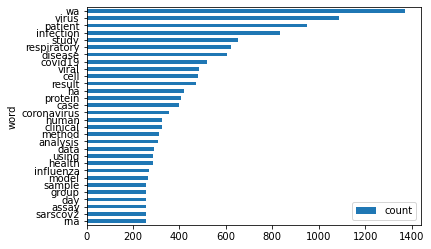

In [179]:
# # Top words in the trianing set
# word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'count': np.asarray(x_train.sum(axis=0))})
# word_count.sort_values('count', ascending=False).set_index('word')[:30].sort_values('count', ascending=True).plot(kind='barh')


In [183]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [208]:
LDA_data =train_df['abstract_tokens_clean']

# Reformatting tokens for LDA

## this clean numbers out
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

texts = list(sent_to_words(LDA_data))

dictionary = corpora.Dictionary(texts)
dict(list(dictionary.token2id.items())[0:10])

{'addition': 0,
 'affected': 1,
 'affecting': 2,
 'also': 3,
 'although': 4,
 'among': 5,
 'analysis': 6,
 'apart': 7,
 'available': 8,
 'base': 9}

In [196]:
## create corpus for LDA
corpus = [dictionary.doc2bow(item) for item in texts]

In [220]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=dictionary,
                                            num_topics=30,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [221]:
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.



Perplexity:  -16.097162489416522


In [222]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4385372651651374


In [ ]:
import pyLDAvis
import pyLDAvis.gensim  
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary, R = 50)
vis

In [ ]:
## show topic
for idx, topic in lda_model.show_topics(formatted=False, num_words= 30):
    print('Topic: {} \nWords: {}'.format(idx, '|'.join([w[0] for w in topic])))

In [211]:
topic_assignments = lda_model.get_document_topics(corpus,minimum_probability=0)

In [276]:
probabilities = [ [entry for entry in doc] for doc in topic_assignments ]

In [280]:
sort_prob = [sorted(x, key = lambda x: x[1], reverse = True) for x in probabilities]

In [283]:
## obtain highest score topic

topic_list = [x[0][0] for x in sort_prob]

In [285]:
len(topic_list)

1033

In [ ]:
## obtain topic key words



In [ ]:
probabilities =[ [entry[1] for entry in doc] for doc in topic_assignments ]

In [216]:
testtest =  [ doc for doc in topic_assignments ]

In [238]:
# def format_topics_sentences(ldamodel=lda_model, corpus=corpus):
#     # Init output
#     sent_topics_df = pd.DataFrame()

#     # Get main topic in each document
#     for i, row in enumerate(ldamodel[corpus]):
#         row = sorted(row, key=lambda x: (x[1]), reverse=True)
#         # Get the Dominant topic, Perc Contribution and Keywords for each document
#         for j, (topic_num, prop_topic) in enumerate(row):
#             if j == 0:  # => dominant topic
#                 wp = ldamodel.show_topic(topic_num)
#                 topic_keywords = ", ".join([word for word, prop in wp])
#                 sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
#             else:
#                 break
#     sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

#     # Add original text to the end of the output
# #     contents = pd.Series(texts)
# #     sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#     return(sent_topics_df)

In [ ]:
# df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus)